In [56]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

print(os.getcwd())


tableS3 = pd.read_csv(os.path.join(os.getcwd(), '..', 'data/HTMSdrugsafety_TableS3_250207a.csv'))

cluster_mappings = {1 : 'AR-VHL-Other',
               2: 'AR-T6N-Indole',
               3: 'AR-Other-Other',
               4: 'Txn-VHL/6N-Other',
               5: 'AR-VHL-Indole',
               6: 'AR-T5N-Other',
               7: 'Txn-Other-Other',
               8: 'AR-T6N/VHL-Pip',
               9: 'AR-T6N-Other',
               10: 'AR-T5N-Pip',
               11: 'AR-DHU-Pip',
               12: 'AR-Other-Pip',
               13: 'Non PROTAC',
               14: 'AR-L5N-Other',
               15: 'AR-L5N-Pip'} 


/Users/shaon/Desktop/PROTACS/github_deposition/code


         Unnamed: 0  Toxic Probability       Drug  Cluster   PRKAR2B  \
0    AZ14170054_001           0.352941  AR-PROTAC        1  0.001706   
1    AZ14170071_001           0.352941  AR-PROTAC        1  0.000922   
2    AZ14170060_001           0.352941  AR-PROTAC        1 -0.000702   
3    AZ14170059_001           0.200000  AR-PROTAC        1  2.694736   
4    AZ14170057_001           0.352941  AR-PROTAC        1 -0.042880   
..              ...                ...        ...      ...       ...   
208  AZ14204520_001           0.888889  AR-PROTAC       15  1.402553   
209  AZ14210155_001           0.888889  AR-PROTAC       15  0.738013   
210  AZ14193649_001           0.888889  AR-PROTAC       15  3.370499   
211  AZ14192728_001           0.888889  AR-PROTAC       15  1.039643   
212  AZ14205915_001           0.352941  AR-PROTAC       15  2.641101   

       NDUFA5      CYC1    NDUFA4      RPL4  PAFAH1B1  ...   NDUFB10  \
0   -0.001706  0.001706  0.001706  0.001706  0.001706  ...  0.0

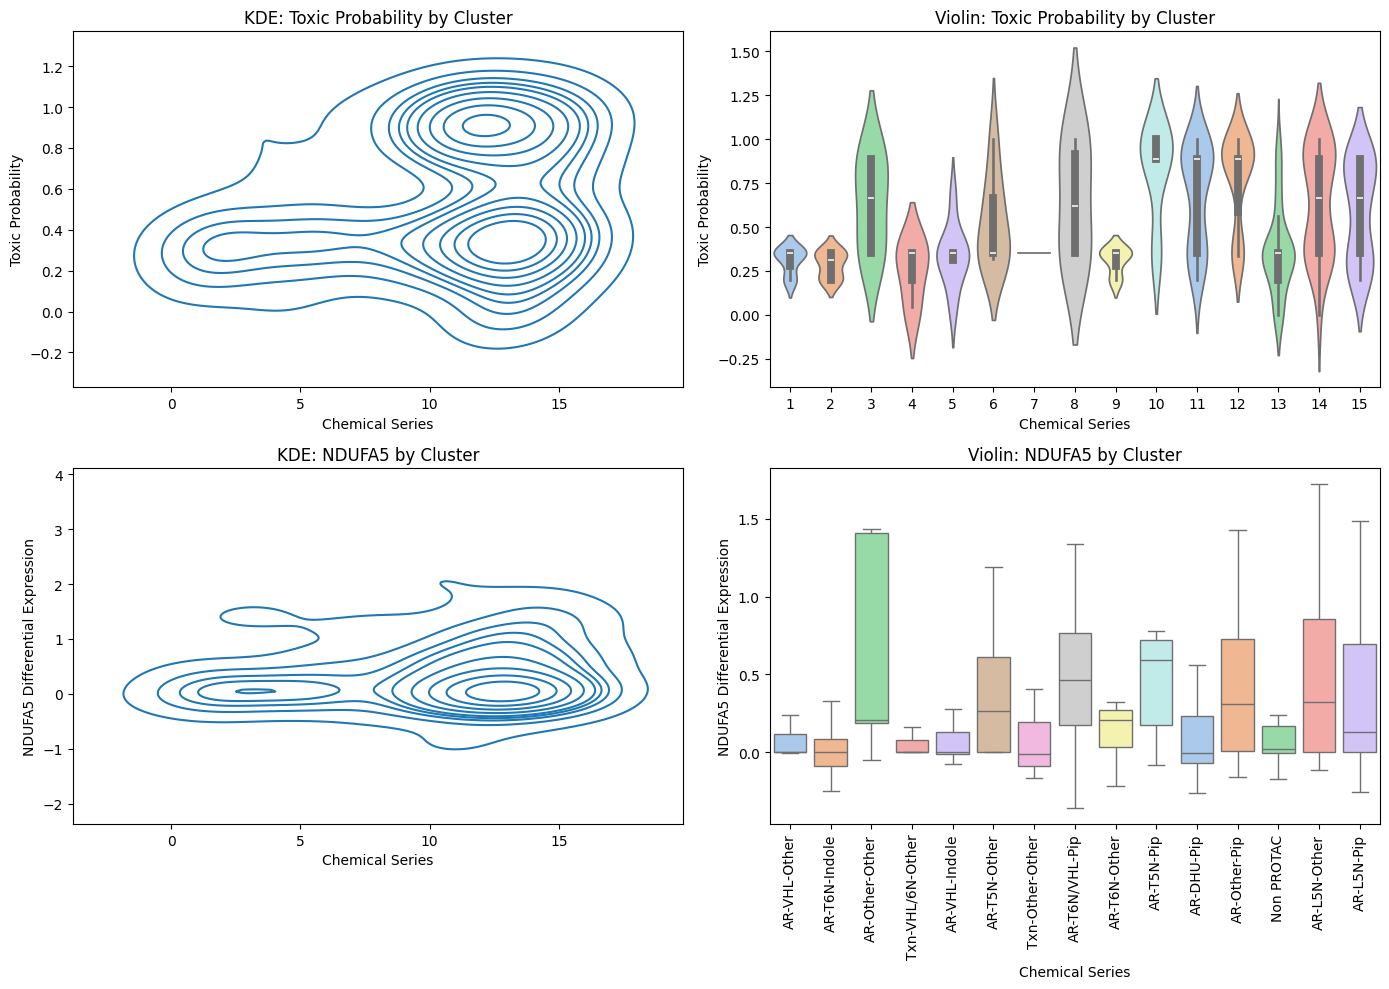

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 cols

# KDE Plot: Toxic Probability by Cluster
sns.kdeplot(data=tableS3, x='Cluster', y='Toxic Probability', common_norm=False, ax=axes[0, 0])
axes[0, 0].set_title('KDE: Toxic Probability by Cluster')
axes[0, 0].set_xlabel('Chemical Series')

# Violin Plot: Toxic Probability by Cluster
sns.violinplot(data=tableS3, x='Cluster', y='Toxic Probability', hue='Cluster', common_norm=False,
               palette = 'pastel', ax=axes[0, 1])
axes[0, 1].set_title('Violin: Toxic Probability by Cluster')
axes[0, 1].set_xlabel('Chemical Series')
axes[0, 1].legend_.remove()


# KDE Plot: NDUFA5 by Cluster
sns.kdeplot(data=tableS3, x='Cluster', y='NDUFA5', common_norm=False, ax=axes[1, 0])
axes[1, 0].set_title('KDE: NDUFA5 by Cluster')
axes[1, 0].set_xlabel('Chemical Series')
axes[1, 0].set_ylabel('NDUFA5 Differential Expression')

toplot_violin = tableS3.copy()
toplot_violin['Chemistry'] = toplot_violin['Cluster'].map(cluster_mappings)

print(toplot_violin)

# Violin Plot: NDUFA5 by Cluster
sns.boxplot(data=toplot_violin, x='Chemistry', y='NDUFA5', hue='Chemistry', showfliers = False, 
            palette = 'pastel',  ax=axes[1, 1])
axes[1, 1].set_title('Violin: NDUFA5 by Cluster')
axes[1, 1].set_xlabel('Chemical Series')
axes[1, 1].set_ylabel('NDUFA5 Differential Expression')
for tick in axes[1, 1].get_xticklabels():
    tick.set_rotation(90)

plt.tight_layout()
plt.show()

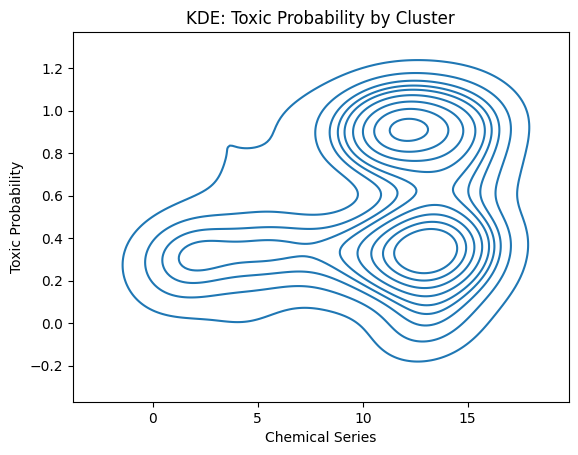

In [58]:
# KDE Plot: Toxic Probability by Cluster
sns.kdeplot(data=tableS3, x='Cluster', y='Toxic Probability', common_norm=False)
plt.title('KDE: Toxic Probability by Cluster')
plt.xlabel('Chemical Series')
plt.show()

In [59]:


cluster_summary = tableS3.groupby('Cluster')['Toxic Probability'].describe().sort_values(
    ['mean', 'std'], ascending=False)

cluster_summary['chemistry'] = cluster_summary.index.map(cluster_mappings)

cluster_summary



,count,mean,std,min,25%,50%,75%,max,chemistry
Cluster,,,,,,,,,
10,9.0,0.818848,0.269043,0.352941,0.888889,0.888889,1.000000,1.000000,AR-T5N-Pip
12,28.0,0.770207,0.255100,0.337030,0.588235,0.888889,0.888889,1.000000,AR-Other-Pip
11,24.0,0.676349,0.286003,0.200000,0.352941,0.888889,0.888889,1.000000,AR-DHU-Pip
8,4.0,0.648693,0.344504,0.352941,0.352941,0.620915,0.916667,1.000000,AR-T6N/VHL-Pip
14,25.0,0.636507,0.305501,0.000000,0.352941,0.666667,0.888889,1.000000,AR-L5N-Other
3,5.0,0.630065,0.268754,0.352941,0.352941,0.666667,0.888889,0.888889,AR-Other-Other
15,26.0,0.591787,0.281863,0.200000,0.352941,0.666667,0.888889,0.888889,AR-L5N-Pip
6,7.0,0.530215,0.257125,0.319348,0.352941,0.352941,0.666667,1.000000,AR-T5N-Other
13,49.0,0.367437,0.249995,0.000000,0.200000,0.352941,0.352941,1.000000,Non PROTAC


### 🧹 Data Cleaning and Filtering Strategy

This analysis applied data filtering process to respect the following profiles:

1. **Tox Score Filtering**  
   Only chemical series with a **median safety prediction score ≥ 66%** were retained.  
   This threshold is based on **troglitazone**, a drug discontinued due to hepatotoxicity, which had a median score of 66%.  
   Any series scoring **lower than troglitazone** was excluded to focus on toxic profiles.

2. **Minimum Sample Size Theshold**  
   To ensure statistical robustness, only clusters with **n > 5 compounds** were included in the final set.

3. **Bimodal Series Selection**  
   From the filtered set, only **clusters exhibiting bimodal distributions** in their toxicity probability were selected.  
   This step aims to capture series with distinct sub-populations of low and high predicted toxicity.

4. **Variability Emphasis**  
   Among eligible clusters, we prioritized those with **higher standard deviation** in toxicity predictions,  
   indicating a greater spread and potential diversity in toxicity behavior across compounds within a series.

The result is a curated selection of chemically meaningful and statistically robust clusters, enriched for variability and toxicity diversity.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


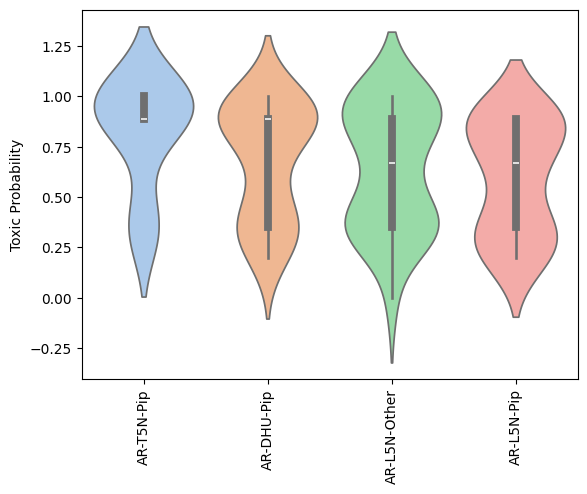

In [60]:
#troglitazone safety thresh (toxicity > 50)
cluster_filter1_idx = cluster_summary.loc[cluster_summary['mean']>0.50].index

cluster_filter1 = cluster_summary.loc[cluster_filter1_idx]

#minimum sample size thresh (n > 30)
n_thresh = 5
cluster_filter2_idx = cluster_filter1.loc[cluster_filter1['count']>n_thresh].index

cluster_filter2 = cluster_filter1.loc[cluster_filter2_idx]

toplot = tableS3.loc[tableS3['Cluster'].isin(cluster_filter2_idx)].copy()
toplot['Chemistry'] = toplot['Cluster'].map(cluster_mappings)

# bimodality and variability check ## DROP OUT CLUSTER 6 (Not Bimodal) & 8 FOR PLOTTING (Other is mixed N)

toplot_bimodal = toplot.loc[toplot['Cluster'].isin([1,10,11,14,15])]
sns.violinplot(toplot_bimodal, x = 'Chemistry', y = 'Toxic Probability',
               hue = 'Chemistry', palette = 'pastel', common_norm=False)
plt.legend().remove()
plt.xticks(rotation = 90)
plt.xlabel(None)
plt.show()


In [61]:
export_columns = ['Unnamed: 0', 'Toxic Probability', 'Drug', 'Cluster','Chemistry', 'NDUFA5']

export_df = toplot[toplot['Chemistry']!='AR-Other-Pip']

toxic_subset = export_df.loc[export_df['Toxic Probability']>0.66].loc[export_df['NDUFA5']>0.44][export_columns]

toxic_subset.set_index('Unnamed: 0', inplace = True)

toxic_subset.to_csv(os.path.join(os.getcwd(), '..', 'data/HTMSdrugsafety_Toxic_Subset_250522a.csv'))

nontoxic_subset = export_df.loc[export_df['Toxic Probability']<0.35].loc[export_df['NDUFA5']<0.01][export_columns]

nontoxic_subset.set_index('Unnamed: 0', inplace = True)

#nontoxic_subset.to_csv(os.path.join(os.getcwd(), '..', 'data/HTMSdrugsafety_Safe_SuperStrict_250522a.csv'))
nontoxic_subset.to_csv(os.path.join(os.getcwd(), '..', 'data/HTMSdrugsafety_Safe_Strict_250522a.csv'))

print(nontoxic_subset.shape)
nontoxic_subset

(6, 5)


,Toxic Probability,Drug,Cluster,Chemistry,NDUFA5
Unnamed: 0,,,,,
AZ14191380_001,0.319348,AR-PROTAC,6,AR-T5N-Other,0.002420
AZ14194011_001,0.200000,AR-PROTAC,11,AR-DHU-Pip,-0.001171
AZ14193218_001,0.000000,AR-PROTAC,14,AR-L5N-Other,0.001424
AZ14181774_002,0.246580,AR-PROTAC,15,AR-L5N-Pip,-0.000383
AZ14197166_003,0.200000,Compound 3,15,AR-L5N-Pip,0.001387
AZ14197166_005,0.200000,Compound 3,15,AR-L5N-Pip,0.000383


In [62]:
print(toxic_subset.shape)

toxic_subset

(26, 5)


,Toxic Probability,Drug,Cluster,Chemistry,NDUFA5
Unnamed: 0,,,,,
AZ14223990_001,0.666667,AR-PROTAC,6,AR-T5N-Other,0.688190
AZ14179145_001,0.666667,AR-PROTAC,6,AR-T5N-Other,1.190997
AZ14188225_001,1.000000,AR-PROTAC,10,AR-T5N-Pip,0.593905
AZ14188393_001,0.888889,AR-PROTAC,10,AR-T5N-Pip,0.677356
AZ14191574_001,0.888889,AR-PROTAC,10,AR-T5N-Pip,0.777777
AZ14219626_001,1.000000,AR-PROTAC,10,AR-T5N-Pip,0.515856
AZ14185665_001,1.000000,AR-PROTAC,10,AR-T5N-Pip,2.181986
AZ14194752_001,0.888889,AR-PROTAC,11,AR-DHU-Pip,0.699486
AZ14195852_003,0.888889,AR-PROTAC,11,AR-DHU-Pip,0.560379


In [63]:
VHLsubset = tableS3.loc[tableS3['Cluster']==1]

VHLexport = VHLsubset[['Unnamed: 0', 'Toxic Probability', 'Drug', 'Cluster','NDUFA5']]

VHLexport.set_index('Unnamed: 0', inplace = True)

VHLexport = VHLexport.assign(Chemistry='AR-VHL-Other').loc[VHLexport['NDUFA5']<0.1]

VHLexport

#VHLexport.to_csv(os.path.join(os.getcwd(), '..', 'data/HTMSdrugsafety_VHLsafe_250522a.csv'))






,Toxic Probability,Drug,Cluster,NDUFA5,Chemistry
Unnamed: 0,,,,,
AZ14170054_001,0.352941,AR-PROTAC,1,-0.001706,AR-VHL-Other
AZ14170071_001,0.352941,AR-PROTAC,1,0.000922,AR-VHL-Other
AZ14170060_001,0.352941,AR-PROTAC,1,0.000702,AR-VHL-Other
AZ14170057_001,0.352941,AR-PROTAC,1,0.002933,AR-VHL-Other
AZ14170055_001,0.200000,AR-PROTAC,1,0.000359,AR-VHL-Other


(-0.1, 1.0)

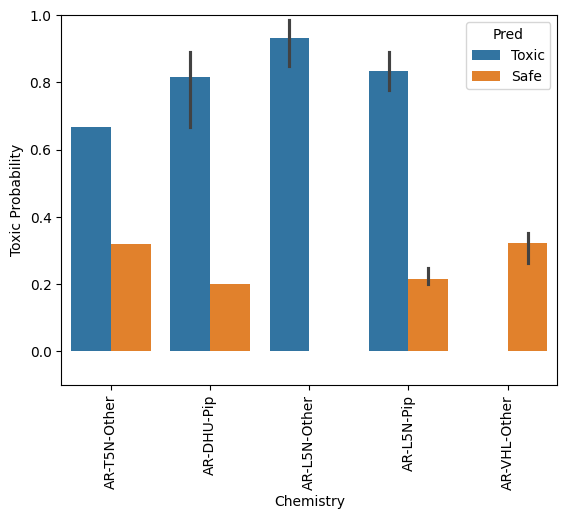

In [64]:
toxic_subset['Pred'] = 'Toxic'
nontoxic_subset['Pred'] = 'Safe'
VHLexport['Pred'] = 'Safe'

total_subset = pd.concat([toxic_subset, nontoxic_subset, VHLexport])

sns.barplot(total_subset.loc[total_subset['Cluster'].isin([1,6,11,14,15])], x = 'Chemistry', y = 'Toxic Probability', hue = 'Pred')
plt.xticks(rotation = 90)
plt.ylim([-0.1,1])

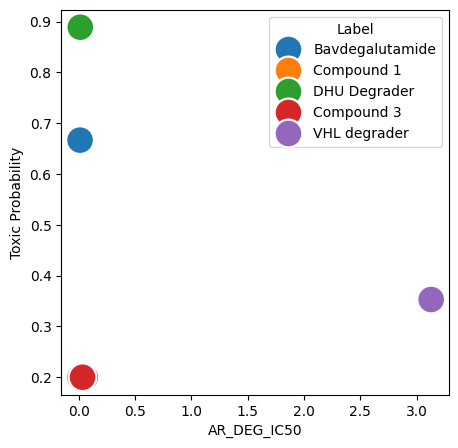

In [ ]:
degrader_data = pd.read_excel(os.path.join(os.getcwd(), '..', 'data/Figure4_ARdegdata_SafetyScores_250523a.xlsx'),
                              names=['Compound', 'Unnamed: 0', 'AR_DEG_IC50', 'Label'])

degrader_data.iloc[:,1] = degrader_data.iloc[:,1].str.replace('-','_')

total_data = degrader_data.merge(total_subset, on='Unnamed: 0', how = 'left')

select_data = total_data.loc[total_data['Label'].isin(degrader_data['Label'].value_counts().index)]

select_data = total_data.loc[~total_data['Label'].isin(['Thalidomide Degrader', 'Lenalidomide Degrader'])]

plt.figure(figsize=(5, 5))  # width=8, height=6 inches
sns.scatterplot(select_data, x = 'AR_DEG_IC50', y = 'Toxic Probability', hue = 'Label', s = 400)
plt.savefig(os.path.join(os.getcwd(), '..', 'figures/Figure_5_ARDEG_Scatter.pdf'))
